# 01 모델 크기 조절
---

## 데이터 로드 및 전처리

In [1]:
from keras.datasets import imdb
import numpy as np

In [5]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 모델 구성 및 컴파일
---

In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1296769 (4.95 MB)
Trainable params: 1296769 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test)
)

Epoch 1/30


49/49 [==============================] - 39s 719ms/step - loss: 0.4561 - accuracy: 0.7844 - val_loss: 0.3017 - val_accuracy: 0.8823
Epoch 2/30
49/49 [==============================] - 9s 176ms/step - loss: 0.2677 - accuracy: 0.8944 - val_loss: 0.3053 - val_accuracy: 0.8724
Epoch 3/30
49/49 [==============================] - 7s 140ms/step - loss: 0.2071 - accuracy: 0.9201 - val_loss: 0.3388 - val_accuracy: 0.8594
Epoch 4/30
49/49 [==============================] - 6s 116ms/step - loss: 0.1744 - accuracy: 0.9314 - val_loss: 0.2874 - val_accuracy: 0.8846
Epoch 5/30
49/49 [==============================] - 6s 116ms/step - loss: 0.1360 - accuracy: 0.9490 - val_loss: 0.3014 - val_accuracy: 0.8818
Epoch 6/30
49/49 [==============================] - 6s 115ms/step - loss: 0.1063 - accuracy: 0.9631 - val_loss: 0.3482 - val_accuracy: 0.8759
Epoch 7/30
49/49 [==============================] - 7s 140ms/step - loss: 0.0848 - accuracy: 0.9705 - val_loss: 0.3702 - val_accuracy: 0.8768
Epo

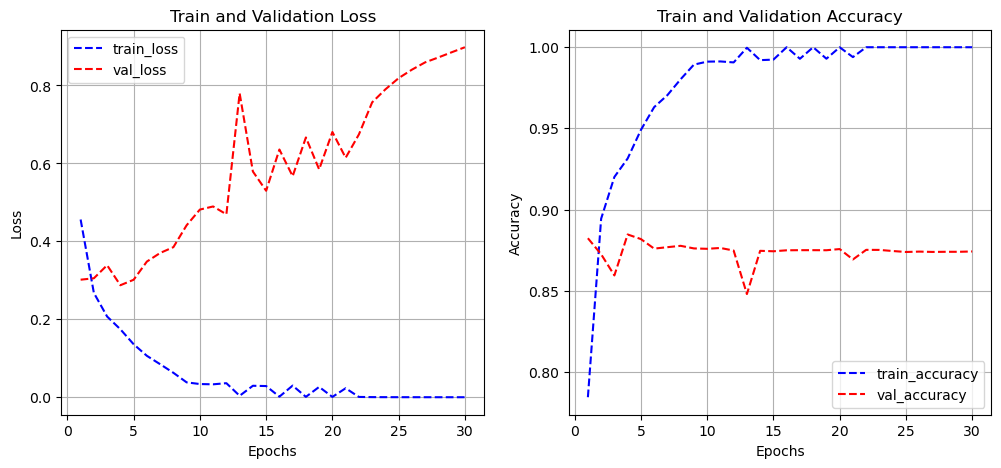

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 크기 증가
---

In [14]:
b_model = models.Sequential()
b_model.add(layers.Dense(300, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(300, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 300)               3000300   
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 output3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 3090901 (11.79 MB)
Trainable params: 3090901 (11.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 40s 780ms/step - loss: 0.4693 - accuracy: 0.7723 - val_loss: 0.3333 - val_accuracy: 0.8585
Epoch 2/30
49/49 [==============================] - 17s 338ms/step - loss: 0.2704 - accuracy: 0.8900 - val_loss: 0.4044 - val_accuracy: 0.8300
Epoch 3/30
49/49 [==============================] - 15s 309ms/step - loss: 0.2101 - accuracy: 0.9170 - val_loss: 0.2776 - val_accuracy: 0.8868
Epoch 4/30
49/49 [==============================] - 15s 310ms/step - loss: 0.1665 - accuracy: 0.9350 - val_loss: 0.3247 - val_accuracy: 0.8680
Epoch 5/30
49/49 [==============================] - 19s 392ms/step - loss: 0.1318 - accuracy: 0.9476 - val_loss: 0.3053 - val_accuracy: 0.8748
Epoch 6/30
49/49 [==============================] - 21s 431ms/step - loss: 0.0902 - accuracy: 0.9669 - val_loss: 0.3377 - val_accuracy: 0.8811
Epoch 7/30
49/49 [==============================] - 22s 444ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.9158 - val_accuracy: 0.7588

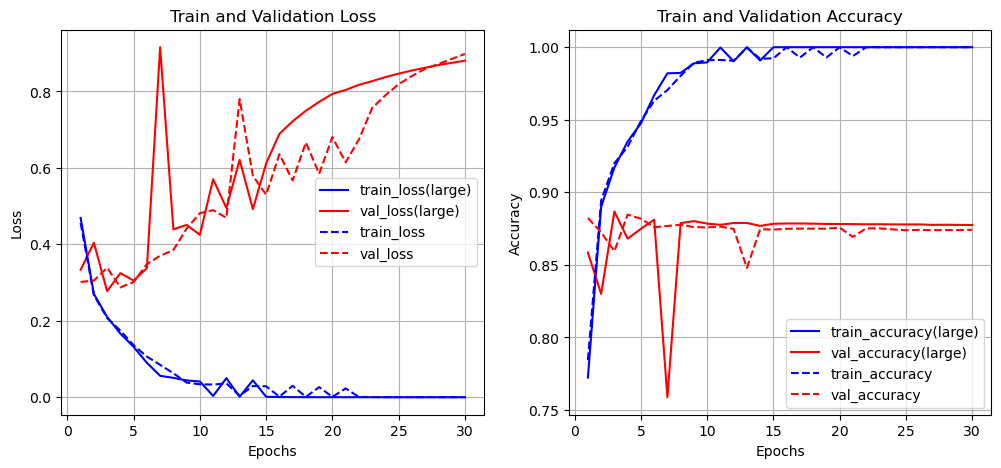

In [16]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 크기 감소

In [17]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 16)                160016    
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 output2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 31s 581ms/step - loss: 0.4760 - accuracy: 0.8078 - val_loss: 0.3609 - val_accuracy: 0.8673
Epoch 2/30
49/49 [==============================] - 3s 63ms/step - loss: 0.2813 - accuracy: 0.9014 - val_loss: 0.2889 - val_accuracy: 0.8878
Epoch 3/30
49/49 [==============================] - 2s 39ms/step - loss: 0.2203 - accuracy: 0.9217 - val_loss: 0.2775 - val_accuracy: 0.8893
Epoch 4/30
49/49 [==============================] - 2s 41ms/step - loss: 0.1869 - accuracy: 0.9330 - val_loss: 0.2834 - val_accuracy: 0.8863
Epoch 5/30
49/49 [==============================] - 1s 30ms/step - loss: 0.1643 - accuracy: 0.9401 - val_loss: 0.2912 - val_accuracy: 0.8845
Epoch 6/30
49/49 [==============================] - 2s 46ms/step - loss: 0.1450 - accuracy: 0.9492 - val_loss: 0.3083 - val_accuracy: 0.8799
Epoch 7/30
49/49 [==============================] - 2s 39ms/step - loss: 0.1276 - accuracy: 0.9566 - val_loss: 0.3659 - val_accuracy: 0.8650
Epoch 8/30


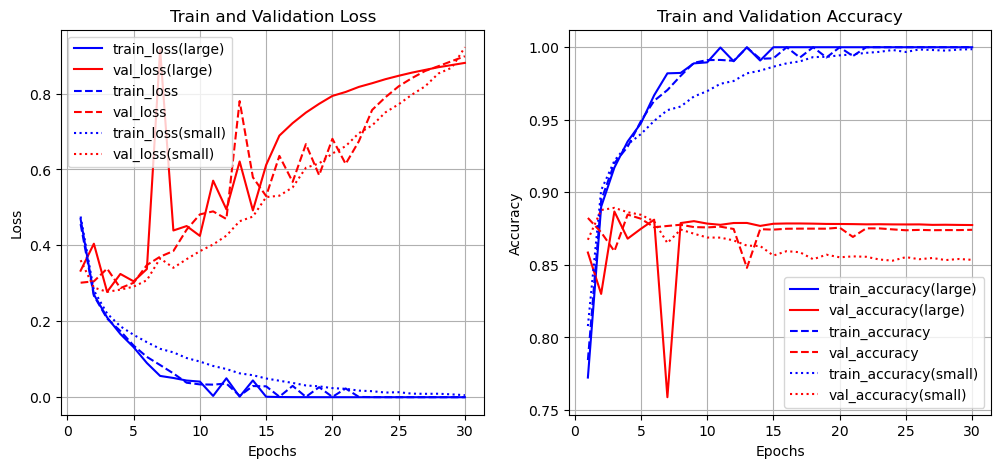

In [19]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 02 규제
---

## L1 규제
---

In [20]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 42s 806ms/step - loss: 3.7348 - accuracy: 0.5630 - val_loss: 1.9321 - val_accuracy: 0.7201
Epoch 2/30
49/49 [==============================] - 3s 54ms/step - loss: 1.8642 - accuracy: 0.6124 - val_loss: 1.7923 - val_accuracy: 0.6968
Epoch 3/30
49/49 [==============================] - 2s 43ms/step - loss: 1.7517 - accuracy: 0.6512 - val_loss: 1.7137 - val_accuracy: 0.6831
Epoch 4/30
49/49 [==============================] - 2s 49ms/step - loss: 1.6697 - accuracy: 0.6614 - val_loss: 1.6231 - val_accuracy: 0.6994
Epoch 5/30
49/49 [==============================] - 1s 29ms/step - loss: 1.6051 - accuracy: 0.6662 - val_loss: 1.5868 - val_accuracy: 0.6437
Epoch 6/30
49/49 [==============================] - 2s 31ms/step - loss: 1.5520 - accuracy: 0.6830 - val_loss: 1.5179 - val_accuracy: 0.7192
Epoch 7/30
49/49 [==============================] - 1s 28ms/step - loss: 1.5081 - accuracy: 0.7131 - val_loss: 1.4999 - val_accuracy: 0.7156
Epoch 8/30


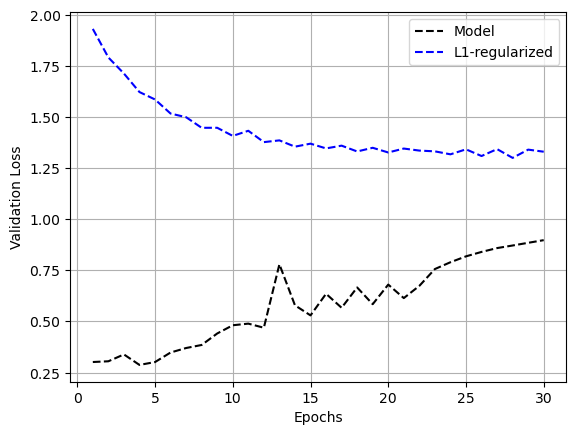

In [22]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## L2 규제
---

In [23]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 29s 530ms/step - loss: 0.7514 - accuracy: 0.8129 - val_loss: 0.6066 - val_accuracy: 0.8437
Epoch 2/30
49/49 [==============================] - 3s 51ms/step - loss: 0.5413 - accuracy: 0.8756 - val_loss: 0.5203 - val_accuracy: 0.8760
Epoch 3/30
49/49 [==============================] - 2s 36ms/step - loss: 0.4907 - accuracy: 0.8819 - val_loss: 0.4887 - val_accuracy: 0.8755
Epoch 4/30
49/49 [==============================] - 2s 36ms/step - loss: 0.4614 - accuracy: 0.8860 - val_loss: 0.4676 - val_accuracy: 0.8772
Epoch 5/30
49/49 [==============================] - 2s 33ms/step - loss: 0.4413 - accuracy: 0.8884 - val_loss: 0.4814 - val_accuracy: 0.8592
Epoch 6/30
49/49 [==============================] - 2s 31ms/step - loss: 0.4275 - accuracy: 0.8900 - val_loss: 0.4636 - val_accuracy: 0.8656
Epoch 7/30
49/49 [==============================] - 1s 30ms/step - loss: 0.4181 - accuracy: 0.8901 - val_loss: 0.4599 - val_accuracy: 0.8638
Epoch 8/30


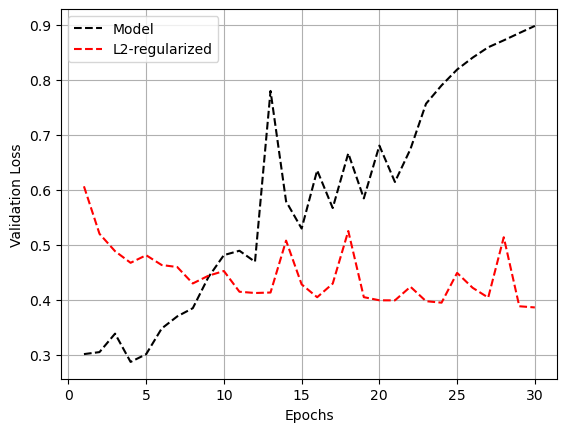

In [25]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## L1 L2 규제
---

In [26]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 34s 624ms/step - loss: 3.8786 - accuracy: 0.5381 - val_loss: 2.0252 - val_accuracy: 0.5304
Epoch 2/30
49/49 [==============================] - 2s 45ms/step - loss: 1.9412 - accuracy: 0.5970 - val_loss: 1.8645 - val_accuracy: 0.6511
Epoch 3/30
49/49 [==============================] - 2s 36ms/step - loss: 1.8184 - accuracy: 0.6333 - val_loss: 1.7719 - val_accuracy: 0.6614
Epoch 4/30
49/49 [==============================] - 2s 46ms/step - loss: 1.7193 - accuracy: 0.6402 - val_loss: 1.6694 - val_accuracy: 0.6089
Epoch 5/30
49/49 [==============================] - 2s 44ms/step - loss: 1.6408 - accuracy: 0.6318 - val_loss: 1.6130 - val_accuracy: 0.6768
Epoch 6/30
49/49 [==============================] - 2s 50ms/step - loss: 1.5819 - accuracy: 0.5989 - val_loss: 1.5529 - val_accuracy: 0.6306
Epoch 7/30
49/49 [==============================] - 2s 39ms/step - loss: 1.5371 - accuracy: 0.5436 - val_loss: 1.5231 - val_accuracy: 0.6279
Epoch 8/30


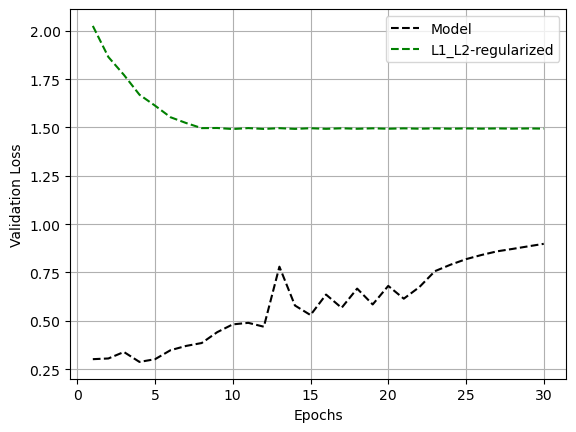

In [28]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

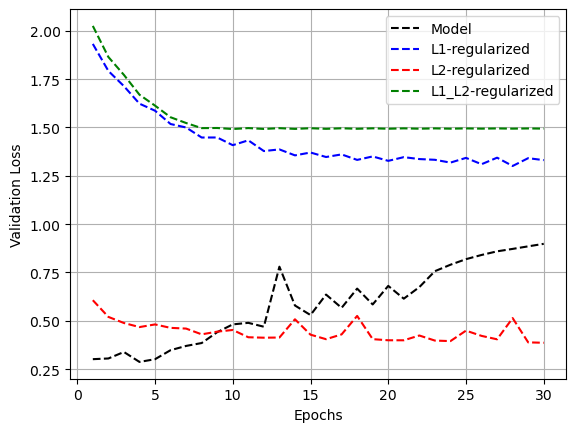

In [29]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [30]:
from tensorflow import keras
from tensorflow.keras import models, layers

your_model =  models.Sequential()
your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(5), activation='relu', input_shape=(10000, )))
your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(5), activation='relu'))
your_model.add(layers.Dense(1, activation='sigmoid'))
your_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
your_model_hist = your_model.fit(x_train, y_train,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 41s 783ms/step - loss: 74.7575 - accuracy: 0.5468 - val_loss: 50.5467 - val_accuracy: 0.6939
Epoch 2/30
49/49 [==============================] - 3s 52ms/step - loss: 42.1533 - accuracy: 0.5383 - val_loss: 34.1104 - val_accuracy: 0.5000
Epoch 3/30
49/49 [==============================] - 2s 36ms/step - loss: 27.7898 - accuracy: 0.5249 - val_loss: 21.8358 - val_accuracy: 0.5000
Epoch 4/30
49/49 [==============================] - 2s 32ms/step - loss: 17.3110 - accuracy: 0.5242 - val_loss: 13.1123 - val_accuracy: 0.5173
Epoch 5/30
49/49 [==============================] - 2s 35ms/step - loss: 10.0396 - accuracy: 0.5277 - val_loss: 7.2571 - val_accuracy: 0.5019
Epoch 6/30
49/49 [==============================] - 1s 29ms/step - loss: 5.3482 - accuracy: 0.5122 - val_loss: 3.6900 - val_accuracy: 0.5488
Epoch 7/30
49/49 [==============================] - 1s 27ms/step - loss: 2.6626 - accuracy: 0.5076 - val_loss: 1.8219 - val_accuracy: 0.5000
Ep

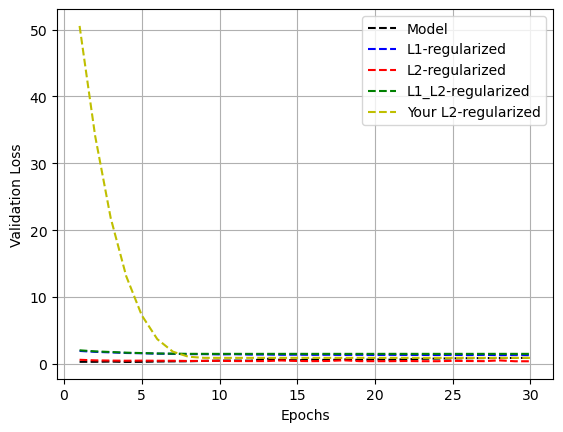

In [32]:
your_val_loss = your_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 03 드롭아웃
---

## 드롭아웃(20%)

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 33s 630ms/step - loss: 0.5435 - accuracy: 0.7491 - val_loss: 0.4050 - val_accuracy: 0.8649
Epoch 2/30
49/49 [==============================] - 4s 79ms/step - loss: 0.3545 - accuracy: 0.8699 - val_loss: 0.3056 - val_accuracy: 0.8837
Epoch 3/30
49/49 [==============================] - 3s 62ms/step - loss: 0.2738 - accuracy: 0.9016 - val_loss: 0.2778 - val_accuracy: 0.8894
Epoch 4/30
49/49 [==============================] - 3s 52ms/step - loss: 0.2230 - accuracy: 0.9207 - val_loss: 0.2739 - val_accuracy: 0.8883
Epoch 5/30
49/49 [==============================] - 3s 52ms/step - loss: 0.1920 - accuracy: 0.9343 - val_loss: 0.2855 - val_accuracy: 0.8866
Epoch 6/30
49/49 [==============================] - 2s 46ms/step - loss: 0.1660 - accuracy: 0.9433 - val_loss: 0.2991 - val_accuracy: 0.8832
Epoch 7/30
49/49 [==============================] - 2s 44ms/step - loss: 0.1445 - accuracy: 0.9509 - val_loss: 0.3081 - val_accuracy: 0.8807
Epoch 8/30


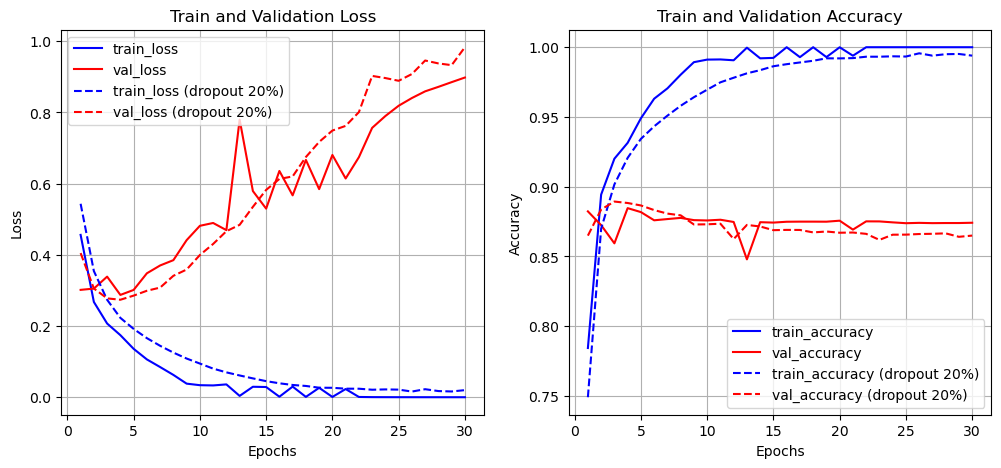

In [35]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 드롭아웃(50%)
---

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 32s 538ms/step - loss: 0.6103 - accuracy: 0.6564 - val_loss: 0.4763 - val_accuracy: 0.8584
Epoch 2/30
49/49 [==============================] - 3s 51ms/step - loss: 0.4596 - accuracy: 0.8027 - val_loss: 0.3621 - val_accuracy: 0.8648
Epoch 3/30
49/49 [==============================] - 2s 39ms/step - loss: 0.3694 - accuracy: 0.8561 - val_loss: 0.3002 - val_accuracy: 0.8844
Epoch 4/30
49/49 [==============================] - 2s 40ms/step - loss: 0.3086 - accuracy: 0.8871 - val_loss: 0.2772 - val_accuracy: 0.8889
Epoch 5/30
49/49 [==============================] - 2s 31ms/step - loss: 0.2673 - accuracy: 0.9038 - val_loss: 0.2783 - val_accuracy: 0.8876
Epoch 6/30
49/49 [==============================] - 1s 30ms/step - loss: 0.2367 - accuracy: 0.9158 - val_loss: 0.2832 - val_accuracy: 0.8862
Epoch 7/30
49/49 [==============================] - 2s 31ms/step - loss: 0.2084 - accuracy: 0.9278 - val_loss: 0.3060 - val_accuracy: 0.8866
Epoch 8/30


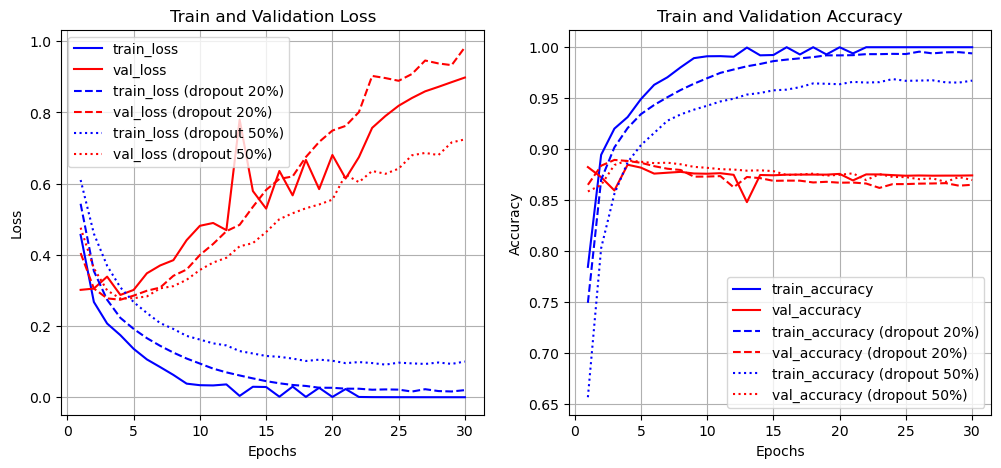

In [38]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()